In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier

Data Preprocessing

In [2]:
df = pd.read_csv('Train_dataset.csv', low_memory=False)
df = df[['Credit_Amount', 'Loan_Annuity', 'Score_Source_2', 'Age_Days', 'Default']]
df.head(50)

,Credit_Amount,Loan_Annuity,Score_Source_2,Age_Days,Default
0,61190.55,3416.85,0.478787,13957,0
1,15282,1826.55,0.215068,14162,0
2,59527.35,2788.2,0.552795,16790,0
3,53870.4,2295.45,0.135182,23195,0
4,133988.4,3547.35,0.301182,11366,0
5,13752,653.85,0.697928,13881,0
6,128835,3779.55,0.602545,21323,0
7,60415.2,3097.8,0.657508,22493,0
8,45000,1200.15,0.637594,NaN,0
9,16320.15,1294.65,0.063343,20507,0


In [3]:
df[df['Default'] == 1]

,Credit_Amount,Loan_Annuity,Score_Source_2,Age_Days,Default
32,18000,900,0.287172,16900,1
73,14391,NaN,0.284966,17266,1
75,15750,1158.75,0.611850,14888,1
94,22500,2362.5,0.739379,11724,1
118,29628,1906.2,0.312713,12072,1
...,...,...,...,...,...
121779,130500,3815.55,0.358568,16121,1
121791,88885.8,8894.25,0.282823,11481,1
121829,44776.8,3550.5,0.189331,8991,1
121830,13500,675,0.082296,12661,1


In [4]:
df.columns

Index(['Credit_Amount', 'Loan_Annuity', 'Score_Source_2', 'Age_Days',
       'Default'],
      dtype='object')

In [5]:
# Create a correlation matrix
corr_matrix = df.corr()

C:\Users\nosao\AppData\Local\Temp\ipykernel_7828\3229093785.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


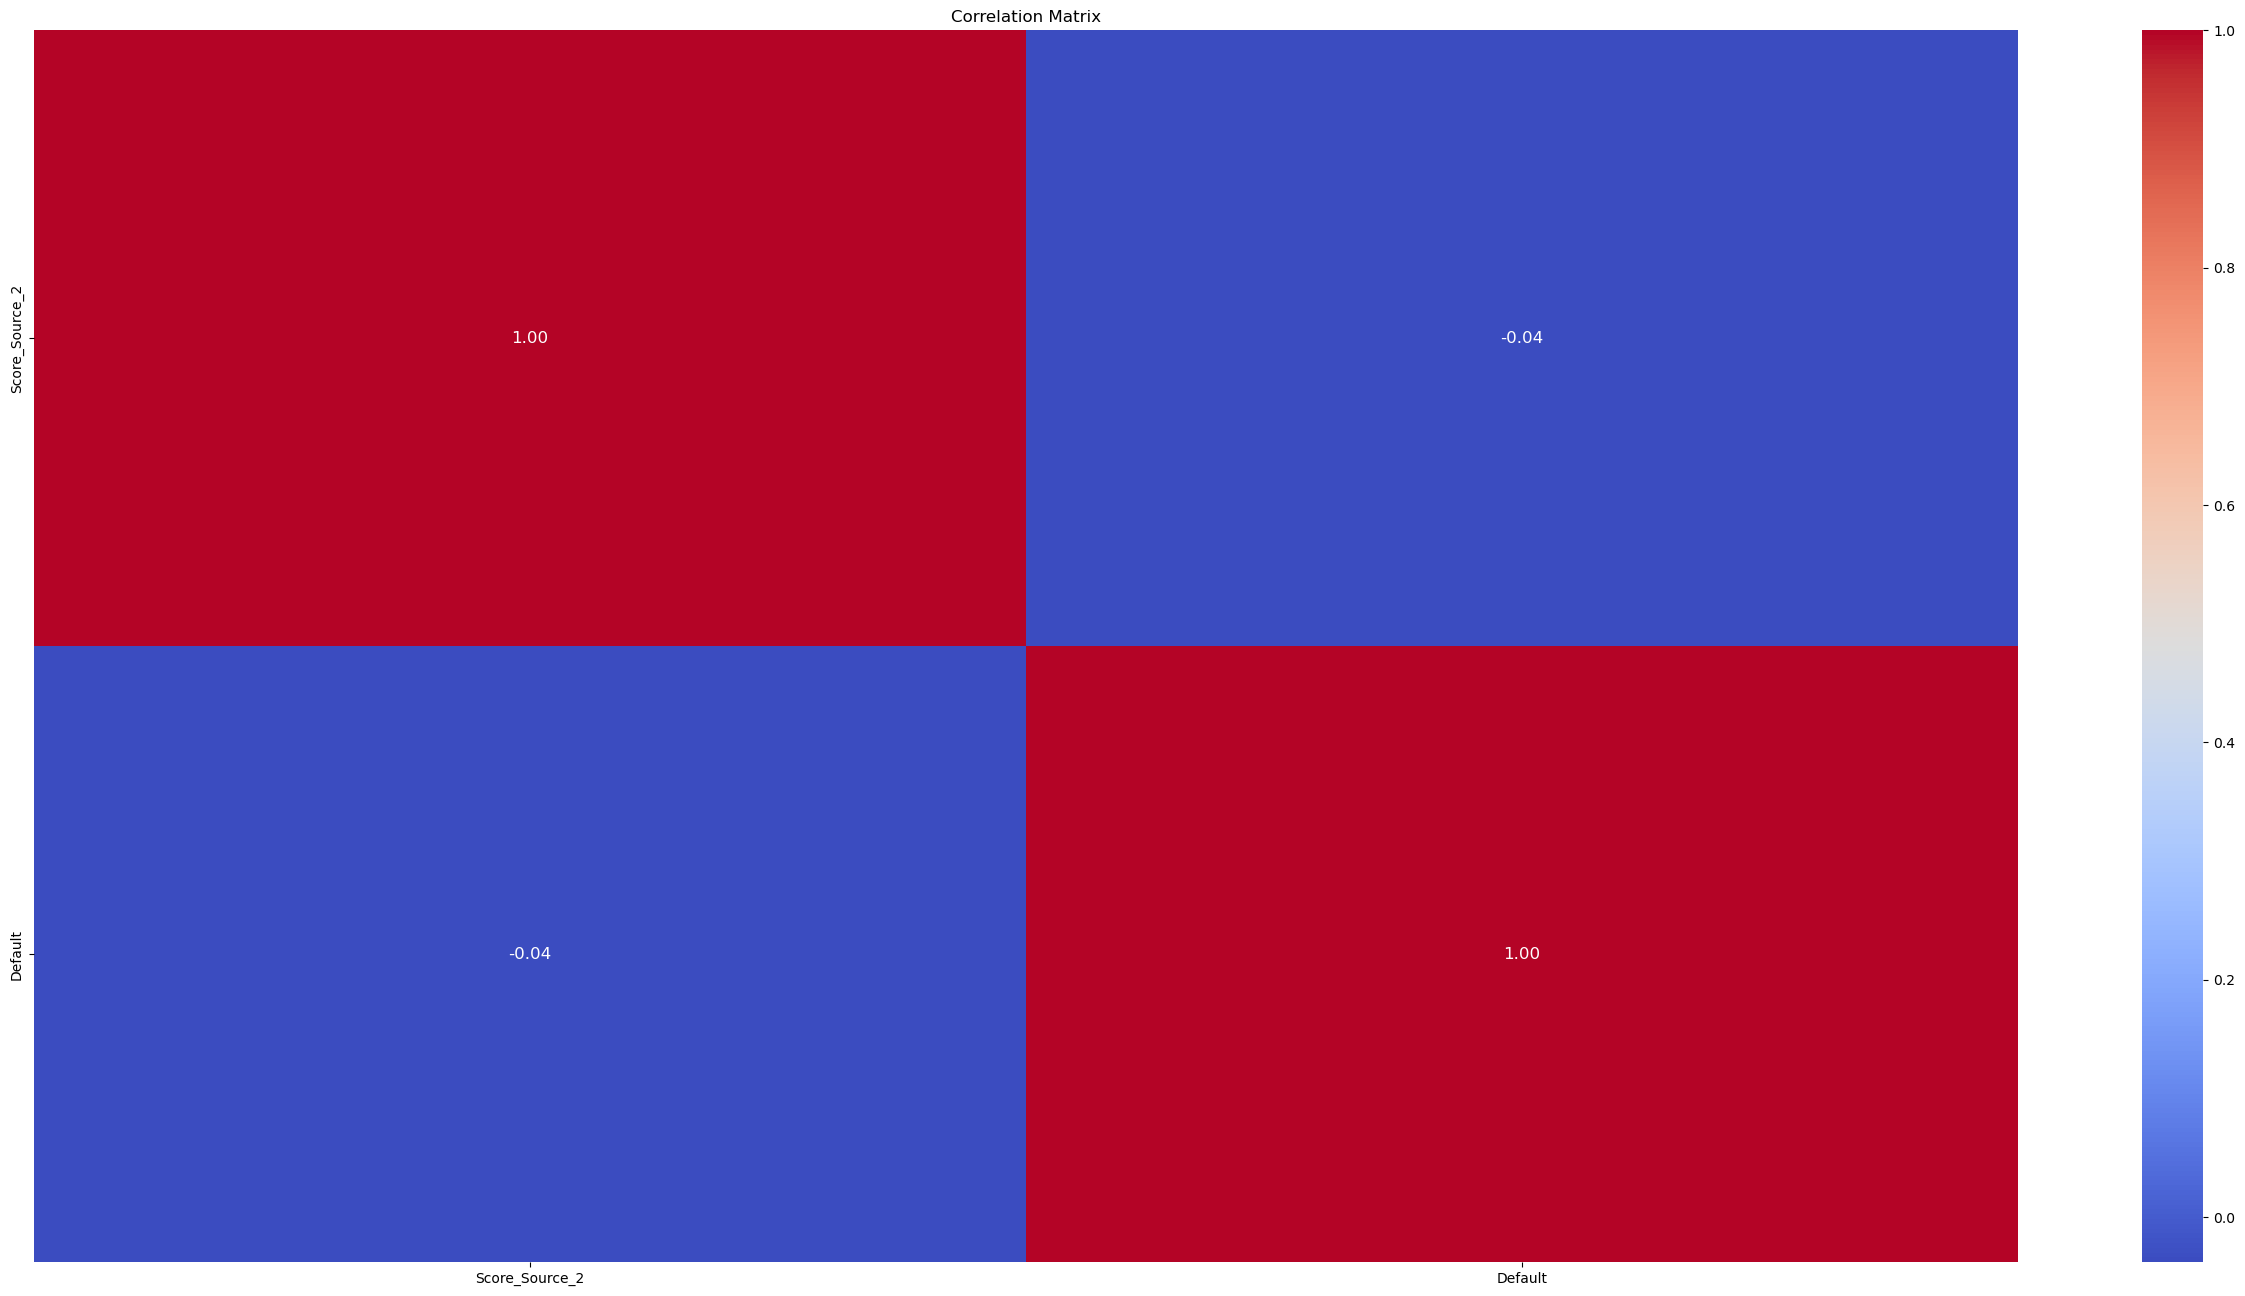

In [6]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(32, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Credit_Amount   118224 non-null  object 
 1   Loan_Annuity    117044 non-null  object 
 2   Score_Source_2  116170 non-null  float64
 3   Age_Days        118256 non-null  object 
 4   Default         121856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


In [8]:
#Converting columns to numerical data types

df.Credit_Amount.replace("$", np.nan, inplace = True)
df.Credit_Amount = pd.to_numeric(df.Credit_Amount)

df.Loan_Annuity.replace(["$", "#VALUE!"], np.nan, inplace = True)
df.Loan_Annuity = pd.to_numeric(df.Loan_Annuity)

df.Age_Days.replace("x", np.nan, inplace = True)
df.Age_Days = pd.to_numeric(df.Age_Days)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Credit_Amount   118219 non-null  float64
 1   Loan_Annuity    117030 non-null  float64
 2   Score_Source_2  116170 non-null  float64
 3   Age_Days        118239 non-null  float64
 4   Default         121856 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.6 MB


In [10]:
df.isna().sum()
#df.isna().sum().sum()

Credit_Amount     3637
Loan_Annuity      4826
Score_Source_2    5686
Age_Days          3617
Default              0
dtype: int64

In [11]:
#Handling Missing Values
df = df.dropna(axis=0, how='any')

In [12]:
df.isna().sum()
#df.isna().sum().sum()

Credit_Amount     0
Loan_Annuity      0
Score_Source_2    0
Age_Days          0
Default           0
dtype: int64

Model Training

In [13]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_split= 2, criterion = 'entropy', random_state  = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [16]:
#print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

In [17]:
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

93.27335047129391

In [18]:
rf_classifier.predict([[18000.0,900.000000,0.287172,16900.0]])

array([1], dtype=int64)

In [19]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96     19345\n           1       0.84      0.18      0.30      1661\n\n    accuracy                           0.93     21006\n   macro avg       0.89      0.59      0.63     21006\nweighted avg       0.93      0.93      0.91     21006\n'

In [20]:
print(rf_classifier.score(X_test, y_test))

0.9327335047129391


In [21]:
# Get feature importance from the trained RandomForestRegressor
feature_importances = rf_classifier.feature_importances_

In [22]:
# Sort feature importance in descending order
indices = np.argsort(feature_importances)

In [23]:
# Rearrange feature names based on feature importance
feature_names = df.columns
sorted_feature_names = [feature_names[i] for i in indices]

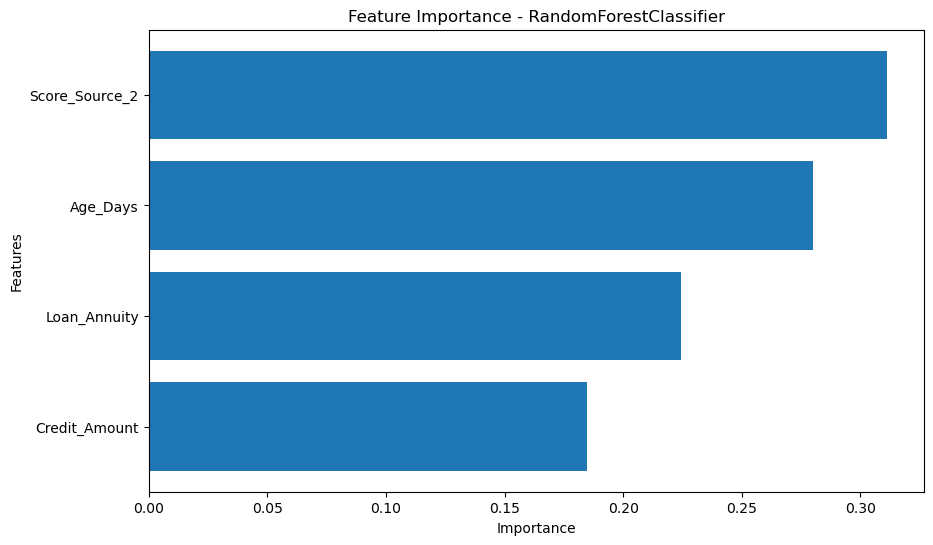

In [24]:
# Plot feature importances horizontally
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - RandomForestClassifier")
plt.barh(range(len(feature_importances)), feature_importances[indices])
plt.yticks(range(len(feature_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Modelling the Testing Data

In [25]:
df_test = pd.read_csv('Test_dataset.csv', low_memory=False)
df_test = df_test[['Credit_Amount', 'Loan_Annuity', 'Score_Source_2', 'Age_Days']]
#df_test.head(50)

In [26]:
#Converting columns to numerical data types

df_test.Credit_Amount.replace("$", np.nan, inplace = True)
df_test.Credit_Amount = pd.to_numeric(df_test.Credit_Amount)

df_test.Loan_Annuity.replace(["$", "#VALUE!"], np.nan, inplace = True)
df_test.Loan_Annuity = pd.to_numeric(df_test.Loan_Annuity)

df_test.Age_Days.replace("x", np.nan, inplace = True)
df_test.Age_Days = pd.to_numeric(df_test.Age_Days)

df_test.Score_Source_2.replace(["&", "#"], np.nan, inplace=True)
df_test.Score_Source_2 = pd.to_numeric(df_test.Score_Source_2)


In [27]:
#Handling Missing Values
df_test = df_test.dropna(axis=0, how='any')

In [28]:
df_test

,Credit_Amount,Loan_Annuity,Score_Source_2,Age_Days
0,112500.00,4474.80,0.757151,20063.0
1,49752.00,3252.15,0.342269,13200.0
2,67500.00,3375.00,0.683665,15943.0
3,50849.55,3814.65,0.229950,15634.0
4,43603.20,2515.95,0.566971,15811.0
...,...,...,...,...
80894,8794.80,490.05,0.630434,17038.0
80895,107820.00,3152.25,0.599436,13867.0
80897,52128.00,2742.30,0.403059,9954.0
80898,25470.00,1435.05,0.236402,21464.0


In [29]:
y_pred = rf_classifier.predict(df_test.values)

In [30]:
#y_pred

In [31]:
pred_df = pd.DataFrame(y_pred,columns=['Prediction'])
#pred_df

In [32]:
df_pred = pd.concat([df_test, pred_df], axis=1)
df_pred

,Credit_Amount,Loan_Annuity,Score_Source_2,Age_Days,Prediction
0,112500.00,4474.80,0.757151,20063.0,0.0
1,49752.00,3252.15,0.342269,13200.0,0.0
2,67500.00,3375.00,0.683665,15943.0,0.0
3,50849.55,3814.65,0.229950,15634.0,0.0
4,43603.20,2515.95,0.566971,15811.0,0.0
...,...,...,...,...,...
69815,NaN,NaN,NaN,NaN,0.0
69832,NaN,NaN,NaN,NaN,0.0
69833,NaN,NaN,NaN,NaN,0.0
69841,NaN,NaN,NaN,NaN,0.0


In [33]:
from joblib import dump


# Save the trained model to a file
model_file = 'rf_classifier.joblib'
dump(rf_classifier, model_file)

['rf_classifier.joblib']

In [34]:
!pip install streamlit

In [35]:
import streamlit as st
import joblib

def main(model_path):
    model = joblib.load(model_path)

    # Streamlit UI
    st.title('Automobile Credit Scoring')

    # Input fields for feature values
    Credit_Amount = st.number_input('Credit Amount', min_value=0.0, step=1.0)
    Loan_Annuity  = st.number_input('Loan Annuity', min_value=0.0, step=1.0)
    Score_Source_2 = st.number_input('Score Source', min_value=0.0, step=1.0)
    Age_Days = st.number_input('Age in Days', min_value=0.0, step=1.0)

    # Make prediction when 'Predict' button is clicked
    if st.button('Predict Credit Score'):
        # Prepare input features as a NumPy array
        features = [[Credit_Amount, Loan_Annuity, Score_Source_2, Age_Days]]

        # Make prediction
        prediction = rf_classifier.predict(features)

        # Display prediction
        st.write(f'\nPredicted Credit Score: {prediction[0]:.2f}')


if __name__=='__main__':
    # Load the saved model from the file
    model_path = 'rf_classifier.joblib'
    main(model_path)


2024-08-10 09:10:30.155 
  command:

    streamlit run C:\Users\nosao\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-10 09:10:30.171 Session state does not function when running a script without `streamlit run`
